In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import credentials
import requests
#from pandas import DataFrame
#pulling data API
key =credentials.login['key_isaham']  # extract password

symbol = "UNISEM"  # which stock to pull
response = requests.get("https://admin.isaham.my/api/chart?stock={}&key={}".format(symbol,key))
data = response.json()

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# makes plots bigger
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
#from numpy import asarray
#from pandas import read_csv
#from pandas import DataFrame
#from pandas import concat
#from sklearn.metrics import mean_absolute_error
#from matplotlib import pyplot

In [3]:
ob_cross=85
os_cross=40

In [4]:
df= pd.DataFrame.from_dict(data)
#df_actual = pd.DataFrame.from_dict(data)

In [5]:
df= df[['c','d','h','l','o','v']]
#df_actual= df_actual[['c','d','h','l','o','v']]

In [6]:
df['d'] = pd.to_datetime(df['d'], dayfirst= True )
#df_actual['d'] = pd.to_datetime(df_actual['d'], dayfirst= True )

In [7]:
df

,c,d,h,l,o,v
0,1.2513,1998-07-30,1.2667,1.1744,1.1744,655200.0
1,1.2615,1998-07-31,1.3205,1.2410,1.2615,526500.0
2,1.2769,1998-08-03,1.2821,1.2308,1.2308,288600.0
3,1.2948,1998-08-04,1.3205,1.2769,1.2769,783900.0
4,1.2948,1998-08-05,1.3077,1.2769,1.3077,89700.0
...,...,...,...,...,...,...
5564,7.8600,2021-03-22,7.9300,7.6000,7.6900,938100.0
5565,8.0500,2021-03-23,8.1500,7.8700,7.9000,2084900.0
5566,8.0000,2021-03-24,8.0500,7.8900,8.0500,625500.0
5567,7.7300,2021-03-25,7.9800,7.7000,7.8900,567900.0


In [8]:
#identify MA50
n=50
ma50=[] 

for i in range(len(df["c"])-(n-1)):
    ma = round(sum(df["c"][i:i+(n)])/n,4)
    #print(ma)
    ma50.append(ma)
    
df["MA50"] = pd.Series(ma50)
df["MA50"] = df["MA50"].shift(n-1)
#df["MA50"]

In [9]:
#filter uptrend price above ma50
# Calculating the gap of both MA
df["MAgap"] = df["c"] -  df["MA50"] 

In [10]:
df

,c,d,h,l,o,v,MA50,MAgap
0,1.2513,1998-07-30,1.2667,1.1744,1.1744,655200.0,NaN,NaN
1,1.2615,1998-07-31,1.3205,1.2410,1.2615,526500.0,NaN,NaN
2,1.2769,1998-08-03,1.2821,1.2308,1.2308,288600.0,NaN,NaN
3,1.2948,1998-08-04,1.3205,1.2769,1.2769,783900.0,NaN,NaN
4,1.2948,1998-08-05,1.3077,1.2769,1.3077,89700.0,NaN,NaN
...,...,...,...,...,...,...,...,...
5564,7.8600,2021-03-22,7.9300,7.6000,7.6900,938100.0,8.0252,-0.1652
5565,8.0500,2021-03-23,8.1500,7.8700,7.9000,2084900.0,8.0636,-0.0136
5566,8.0000,2021-03-24,8.0500,7.8900,8.0500,625500.0,8.1016,-0.1016
5567,7.7300,2021-03-25,7.9800,7.7000,7.8900,567900.0,8.1318,-0.4018


In [11]:
#df=df[df['MAgap']>0]

In [12]:
#date_os=list(oversold[oversold == True].index)

In [13]:
df.set_index('d',inplace=True,drop=True)

In [14]:
df

,c,h,l,o,v,MA50,MAgap
d,,,,,,,
1998-07-30,1.2513,1.2667,1.1744,1.1744,655200.0,NaN,NaN
1998-07-31,1.2615,1.3205,1.2410,1.2615,526500.0,NaN,NaN
1998-08-03,1.2769,1.2821,1.2308,1.2308,288600.0,NaN,NaN
1998-08-04,1.2948,1.3205,1.2769,1.2769,783900.0,NaN,NaN
1998-08-05,1.2948,1.3077,1.2769,1.3077,89700.0,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-22,7.8600,7.9300,7.6000,7.6900,938100.0,8.0252,-0.1652
2021-03-23,8.0500,8.1500,7.8700,7.9000,2084900.0,8.0636,-0.0136
2021-03-24,8.0000,8.0500,7.8900,8.0500,625500.0,8.1016,-0.1016


In [15]:
df.index.name = None

In [16]:
df

,c,h,l,o,v,MA50,MAgap
1998-07-30,1.2513,1.2667,1.1744,1.1744,655200.0,NaN,NaN
1998-07-31,1.2615,1.3205,1.2410,1.2615,526500.0,NaN,NaN
1998-08-03,1.2769,1.2821,1.2308,1.2308,288600.0,NaN,NaN
1998-08-04,1.2948,1.3205,1.2769,1.2769,783900.0,NaN,NaN
1998-08-05,1.2948,1.3077,1.2769,1.3077,89700.0,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-22,7.8600,7.9300,7.6000,7.6900,938100.0,8.0252,-0.1652
2021-03-23,8.0500,8.1500,7.8700,7.9000,2084900.0,8.0636,-0.0136
2021-03-24,8.0000,8.0500,7.8900,8.0500,625500.0,8.1016,-0.1016
2021-03-25,7.7300,7.9800,7.7000,7.8900,567900.0,8.1318,-0.4018


In [17]:
#create signal for uptrend price above ma50 
#result not accurate for stochastic when just filter uptrend only
df["Uptrend"]=df['MAgap']>0
Uptrend=df["Uptrend"]
Uptrend_signal=Uptrend[Uptrend==True]

In [18]:
Uptrend_signal

1998-10-12    True
1998-10-13    True
1998-10-14    True
1998-10-15    True
1998-10-16    True
              ... 
2021-03-01    True
2021-03-02    True
2021-03-03    True
2021-03-04    True
2021-03-05    True
Name: Uptrend, Length: 2735, dtype: bool

In [19]:
df

,c,h,l,o,v,MA50,MAgap,Uptrend
1998-07-30,1.2513,1.2667,1.1744,1.1744,655200.0,NaN,NaN,False
1998-07-31,1.2615,1.3205,1.2410,1.2615,526500.0,NaN,NaN,False
1998-08-03,1.2769,1.2821,1.2308,1.2308,288600.0,NaN,NaN,False
1998-08-04,1.2948,1.3205,1.2769,1.2769,783900.0,NaN,NaN,False
1998-08-05,1.2948,1.3077,1.2769,1.3077,89700.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...
2021-03-22,7.8600,7.9300,7.6000,7.6900,938100.0,8.0252,-0.1652,False
2021-03-23,8.0500,8.1500,7.8700,7.9000,2084900.0,8.0636,-0.0136,False
2021-03-24,8.0000,8.0500,7.8900,8.0500,625500.0,8.1016,-0.1016,False
2021-03-25,7.7300,7.9800,7.7000,7.8900,567900.0,8.1318,-0.4018,False


In [20]:
#Create the "L14" column in the DataFrame
df['L14'] = df['l'].rolling(window=14).min()

In [21]:
#Create the "H14" column in the DataFrame
df['H14'] = df['h'].rolling(window=14).max()

In [22]:
#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['c'] - df['L14']) / (df['H14'] - df['L14']) )

In [23]:
#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

In [24]:
df.head(5)

,c,h,l,o,v,MA50,MAgap,Uptrend,L14,H14,%K,%D
1998-07-30,1.2513,1.2667,1.1744,1.1744,655200.0,NaN,NaN,False,NaN,NaN,NaN,NaN
1998-07-31,1.2615,1.3205,1.2410,1.2615,526500.0,NaN,NaN,False,NaN,NaN,NaN,NaN
1998-08-03,1.2769,1.2821,1.2308,1.2308,288600.0,NaN,NaN,False,NaN,NaN,NaN,NaN
1998-08-04,1.2948,1.3205,1.2769,1.2769,783900.0,NaN,NaN,False,NaN,NaN,NaN,NaN
1998-08-05,1.2948,1.3077,1.2769,1.3077,89700.0,NaN,NaN,False,NaN,NaN,NaN,NaN


In [25]:
df.tail(5)

,c,h,l,o,v,MA50,MAgap,Uptrend,L14,H14,%K,%D
2021-03-22,7.86,7.93,7.60,7.69,938100.0,8.0252,-0.1652,False,7.03,8.96,43.005181,31.557283
2021-03-23,8.05,8.15,7.87,7.90,2084900.0,8.0636,-0.0136,False,7.03,8.71,60.714286,43.739822
2021-03-24,8.00,8.05,7.89,8.05,625500.0,8.1016,-0.1016,False,7.03,8.25,79.508197,61.075888
2021-03-25,7.73,7.98,7.70,7.89,567900.0,8.1318,-0.4018,False,7.03,8.25,57.377049,65.866511
2021-03-26,7.79,7.81,7.73,7.78,215200.0,8.1620,-0.3720,False,7.03,8.15,67.857143,68.247463


Text(0.5, 1.0, 'Oscillator')

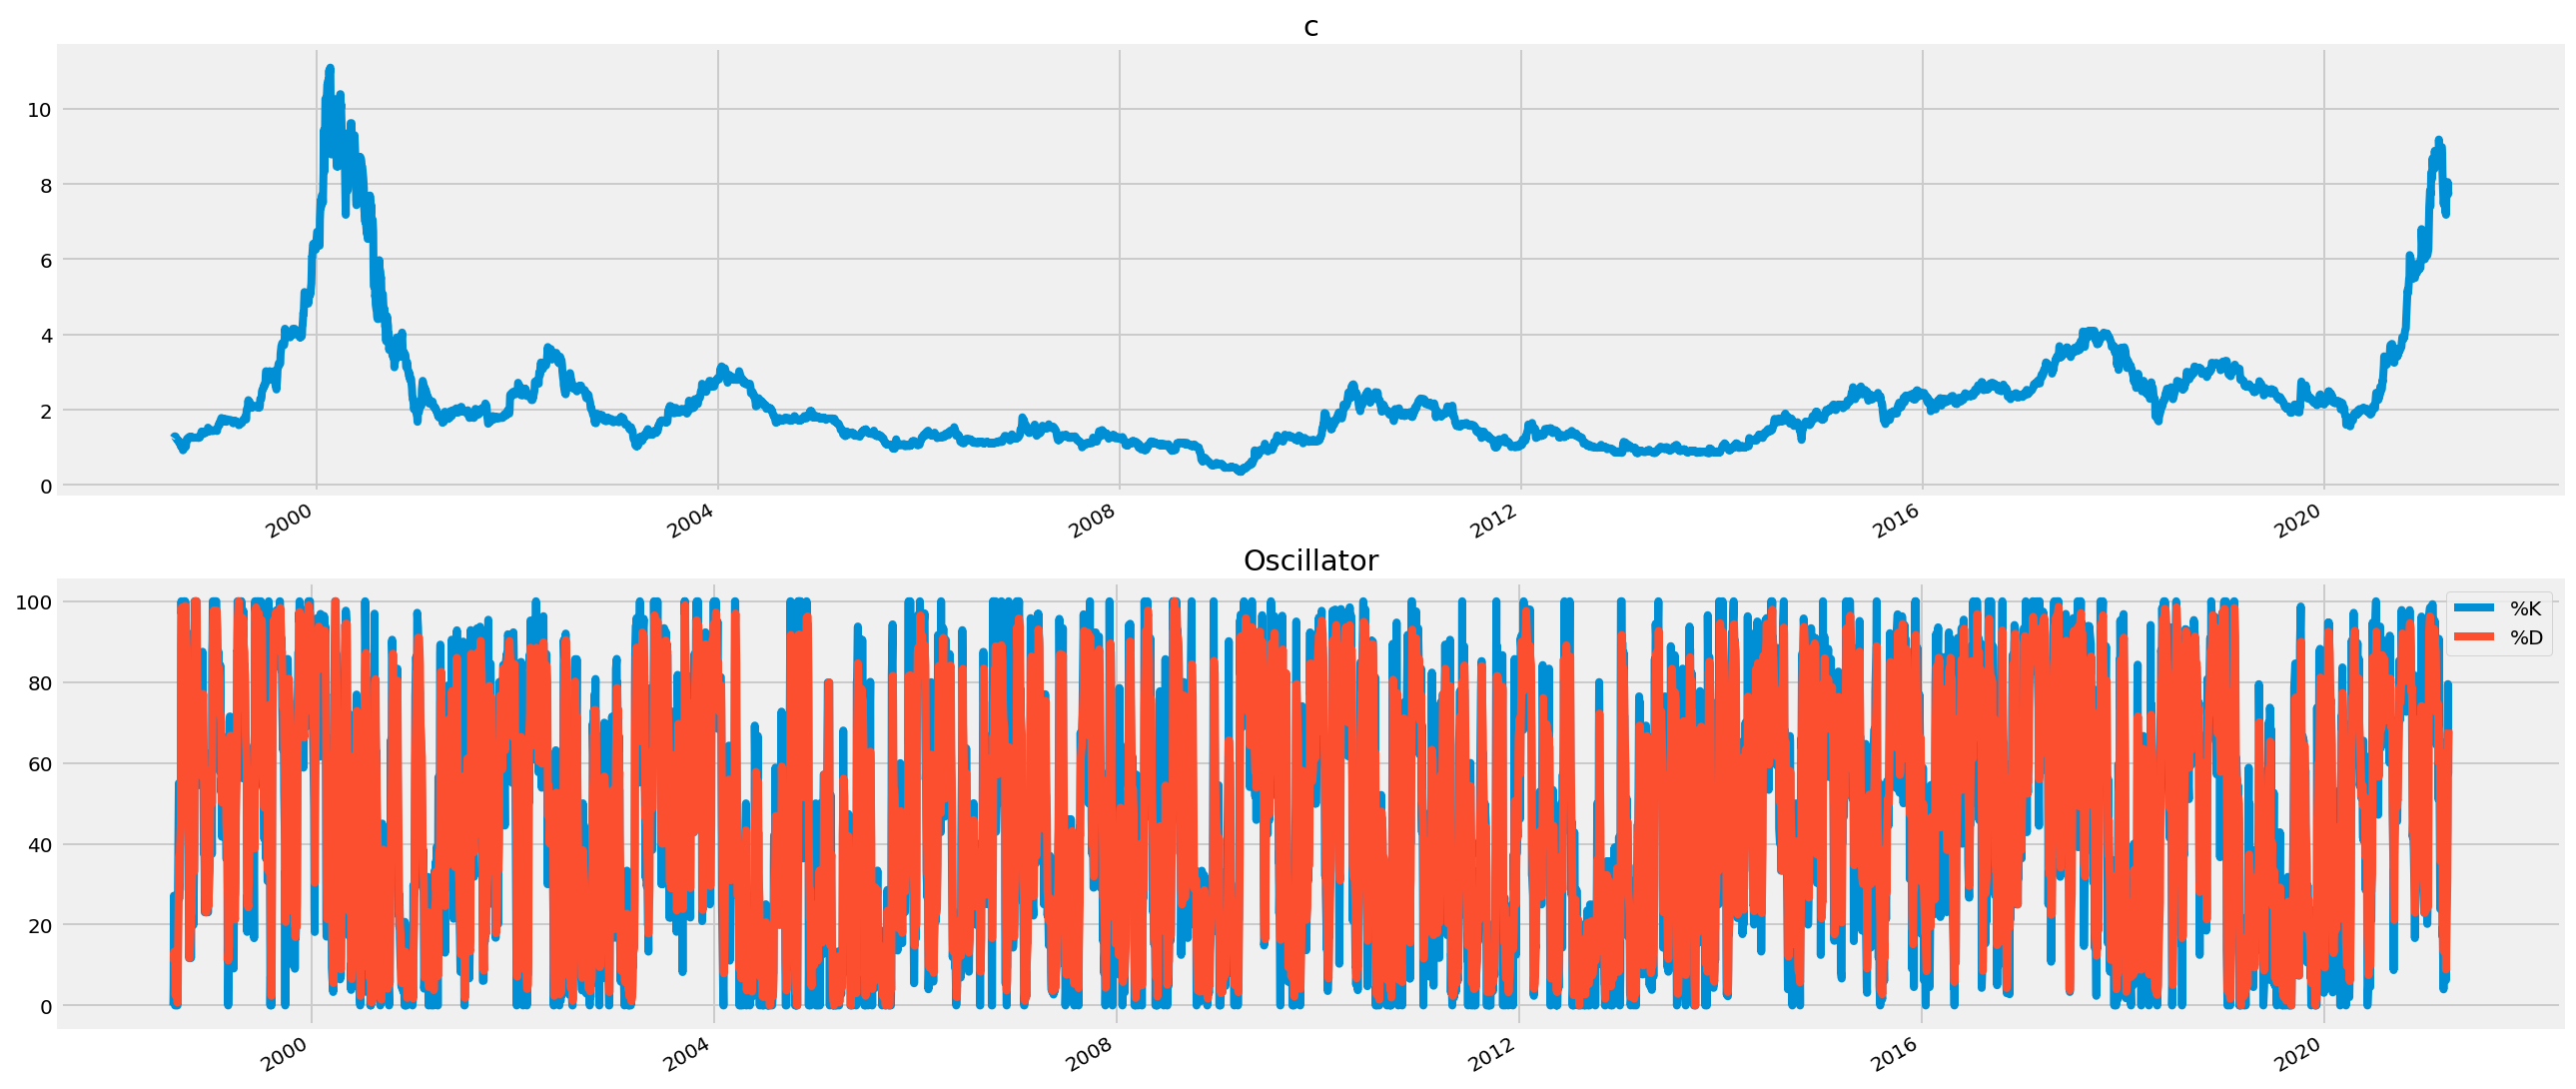

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
df['c'].plot(ax=axes[0]); axes[0].set_title('c')
df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')

In [27]:
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
df['Sell OB'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > ob_cross) 

In [28]:
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
df['Buy OS'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < os_cross) & (Uptrend_signal)

In [29]:
#df['Strategy'] = np.nan  
#df.loc[df['Buy OS'],'Strategy'] = 1  
#df.loc[df['Sell OB'],'Strategy'] = 0 

In [30]:
df

,c,h,l,o,v,MA50,MAgap,Uptrend,L14,H14,%K,%D,Sell OB,Buy OS
1998-07-30,1.2513,1.2667,1.1744,1.1744,655200.0,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False
1998-07-31,1.2615,1.3205,1.2410,1.2615,526500.0,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False
1998-08-03,1.2769,1.2821,1.2308,1.2308,288600.0,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False
1998-08-04,1.2948,1.3205,1.2769,1.2769,783900.0,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False
1998-08-05,1.2948,1.3077,1.2769,1.3077,89700.0,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,7.8600,7.9300,7.6000,7.6900,938100.0,8.0252,-0.1652,False,7.03,8.96,43.005181,31.557283,False,False
2021-03-23,8.0500,8.1500,7.8700,7.9000,2084900.0,8.0636,-0.0136,False,7.03,8.71,60.714286,43.739822,False,False
2021-03-24,8.0000,8.0500,7.8900,8.0500,625500.0,8.1016,-0.1016,False,7.03,8.25,79.508197,61.075888,False,False
2021-03-25,7.7300,7.9800,7.7000,7.8900,567900.0,8.1318,-0.4018,False,7.03,8.25,57.377049,65.866511,False,False


In [31]:
overbought =df['Sell OB']

In [32]:
oversold =df['Buy OS']

In [33]:
date_os=list(oversold[oversold == True].index)

In [34]:
date_ob=list(overbought[overbought == True].index)

In [35]:
# transaction recording
buy = []
sell = []
sdate = []
bdate = []
wr = []
pct = []


for n,i in enumerate(date_os):
    print(n,"Buy:", i, "Price:", df['c'].loc[i])
    buy.append(df['c'].loc[i])
    bdate.append(i)
    r=[]
    #print("before", len(r))
    for m,k in enumerate(date_ob):
        
        if k>i:
            r.append(m)
            #print('after',len(r))
            if len(r) ==1:
                print(m,"Sell :", k, "Price:",df['c'].loc[k])
                print("Percentage change:",(((df['c'].loc[k]/df['c'].loc[i])-1)*100) )
                sell.append(df['c'].loc[k])
                sdate.append(k)
                pct_change=((df['c'].loc[k]/df['c'].loc[i])-1)*100
                pct.append(((df['c'].loc[k]/df['c'].loc[i])-1)*100)
                wr =pct_change>0
                                
                if pct_change >0:
                    print("1")
                else:
                    print('0')
                    
            elif len(r)>1:
                pass
            
        
    print('........')
print('Number of trade:',len(date_os))

diff =len(buy)-len(sell)
#print('difference:',diff)

# Checking for final transaction, make sure it is sell, as we want to close the position
if len(buy) == len(sell):
    print("Yes \n", "Buy:", len(buy), "Sell:", len(sell))
    print("Position closed")
    #pass
elif len(buy) != len(sell):
    print("No, \n", "Buy:{}, Sell:{}, Closing the position".format(len(buy),len(sell)))
    
    del(buy[-diff:])
    del(bdate[-diff:])
    print("Position closed")
    
    

dct = {
    "Buy_Date": bdate,
    "Buy": buy,
    "Sell": sell,
    "Sell_Date": sdate,
    #"W_rate": wr,
    "Pct_change": pct
    
}

trans = pd.DataFrame(dct)
#print(len(wr[wr==True]))

0 Buy: 1998-10-16 00:00:00 Price: 1.2564
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 27.54695956701687
1
........
1 Buy: 1998-10-22 00:00:00 Price: 1.2564
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 27.54695956701687
1
........
2 Buy: 1998-10-29 00:00:00 Price: 1.2564
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 27.54695956701687
1
........
3 Buy: 1998-11-02 00:00:00 Price: 1.2564
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 27.54695956701687
1
........
4 Buy: 1998-12-09 00:00:00 Price: 1.4487
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 10.616414716642497
1
........
5 Buy: 1998-12-17 00:00:00 Price: 1.4487
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 10.616414716642497
1
........
6 Buy: 1998-12-23 00:00:00 Price: 1.4359
3 Sell : 1999-01-12 00:00:00 Price: 1.6025
Percentage change: 11.602479281287014
1
........
7 Buy: 1999-03-02 00:00:00 Price: 1.6923
5 Sell : 1999-04-12 00:00:00 Pri

101 Buy: 2016-09-26 00:00:00 Price: 2.65
158 Sell : 2017-01-09 00:00:00 Price: 2.46
Percentage change: -7.169811320754715
0
........
102 Buy: 2017-04-06 00:00:00 Price: 3.13
165 Sell : 2017-04-26 00:00:00 Price: 3.3
Percentage change: 5.4313099041533475
1
........
103 Buy: 2017-04-10 00:00:00 Price: 3.12
165 Sell : 2017-04-26 00:00:00 Price: 3.3
Percentage change: 5.769230769230771
1
........
104 Buy: 2017-04-17 00:00:00 Price: 3.05
165 Sell : 2017-04-26 00:00:00 Price: 3.3
Percentage change: 8.196721311475418
1
........
105 Buy: 2017-05-19 00:00:00 Price: 3.41
169 Sell : 2017-06-08 00:00:00 Price: 3.64
Percentage change: 6.74486803519061
1
........
106 Buy: 2017-06-22 00:00:00 Price: 3.43
170 Sell : 2017-07-06 00:00:00 Price: 3.64
Percentage change: 6.1224489795918435
1
........
107 Buy: 2017-08-14 00:00:00 Price: 3.87
175 Sell : 2017-09-06 00:00:00 Price: 4.07
Percentage change: 5.167958656330751
1
........
108 Buy: 2017-09-21 00:00:00 Price: 3.88
176 Sell : 2017-10-12 00:00:00 Price

In [36]:
len(buy)-len(sell)

0

In [37]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change
0,1998-10-16,1.2564,1.6025,1999-01-12,27.546960
1,1998-10-22,1.2564,1.6025,1999-01-12,27.546960
2,1998-10-29,1.2564,1.6025,1999-01-12,27.546960
3,1998-11-02,1.2564,1.6025,1999-01-12,27.546960
4,1998-12-09,1.4487,1.6025,1999-01-12,10.616415
...,...,...,...,...,...
122,2020-09-09,3.3700,3.8500,2020-10-08,14.243323
123,2020-09-11,3.5900,3.8500,2020-10-08,7.242340
124,2020-11-25,5.5800,7.4000,2021-01-19,32.616487
125,2020-12-30,6.0000,7.4000,2021-01-19,23.333333


In [38]:
wr = []
for i in range(len(trans)):
    if trans["Pct_change"][i] > 0:
        wr.append(1)
    else:
        wr.append(0)
trans["wr"] = pd.Series(wr)

In [39]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change,wr
0,1998-10-16,1.2564,1.6025,1999-01-12,27.546960,1
1,1998-10-22,1.2564,1.6025,1999-01-12,27.546960,1
2,1998-10-29,1.2564,1.6025,1999-01-12,27.546960,1
3,1998-11-02,1.2564,1.6025,1999-01-12,27.546960,1
4,1998-12-09,1.4487,1.6025,1999-01-12,10.616415,1
...,...,...,...,...,...,...
122,2020-09-09,3.3700,3.8500,2020-10-08,14.243323,1
123,2020-09-11,3.5900,3.8500,2020-10-08,7.242340,1
124,2020-11-25,5.5800,7.4000,2021-01-19,32.616487,1
125,2020-12-30,6.0000,7.4000,2021-01-19,23.333333,1


In [40]:
net_pct=round(sum(trans['Pct_change']),4)
wrate = round(len(trans[trans["wr"]==1])/len(trans["wr"])*100, 4)
print('Stock :{}'.format(symbol))
print('when ob cross>{}.'.format(ob_cross))
print('when os cross<{}.'.format(os_cross))
print("Winning rate at {}% for {} trades and winning percentage {}%.".format(wrate, len(trans["wr"]),net_pct))
risk = round((100-wrate),2)
print("While, using this strategy, we are exposed to {}% of lossing risk for {} trades.".format(risk, len(trans["wr"])))

Stock :UNISEM
when ob cross>85.
when os cross<40.
Winning rate at 75.5906% for 127 trades and winning percentage 592.2062%.
While, using this strategy, we are exposed to 24.41% of lossing risk for 127 trades.


In [41]:
trans['wr'].value_counts()

1    96
0    31
Name: wr, dtype: int64